In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Read Data

In [2]:
PATH_ANIME = "/content/anime.csv"
PATH_RATING = "/content/rating.csv"

df_anime = pd.read_csv(PATH_ANIME)
df_rating = pd.read_csv(PATH_RATING)

In [3]:
df_anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
df_rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


## EDA (Exploratory Data Analysis), Data Visualization and Understanding Data

### Rating Data

In [5]:
df_rating.describe()

,user_id,anime_id,rating
count,550461.000000,550461.000000,550461.000000
mean,2813.763642,10353.945344,6.145976
std,1614.598326,9228.510593,3.738109
min,1.000000,1.000000,-1.000000
25%,1386.000000,1818.000000,6.000000
50%,2851.000000,8532.000000,7.000000
75%,4247.000000,16592.000000,9.000000
max,5487.000000,34325.000000,10.000000


In [6]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550461 entries, 0 to 550460
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   user_id   550461 non-null  int64
 1   anime_id  550461 non-null  int64
 2   rating    550461 non-null  int64
dtypes: int64(3)
memory usage: 12.6 MB


In [ ]:
df_rating["rating"].unique()

array([-1, 10,  8,  6,  9,  7,  3,  5,  4,  1,  2])

In [ ]:
sum(df_rating["rating"] == df_rating["rating"].unique()[-1])

278

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


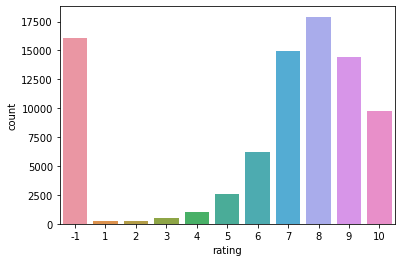

In [ ]:
sns.countplot(df_rating["rating"])

People tend to give more likely 8 or 1 point.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


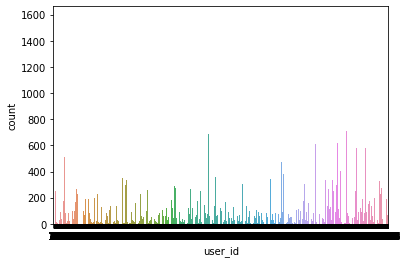

In [ ]:
plt.subplot(121)
sns.countplot(df_rating["user_id"])

plt.subplot(122)
sns.countplot(df_rating["user_id"].value_counts(ascending=True))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


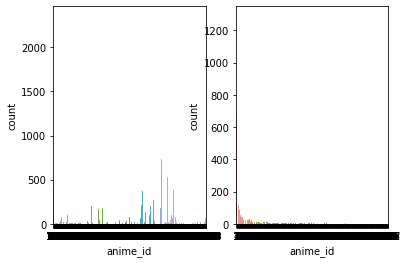

In [ ]:
plt.subplot(121)
sns.countplot(df_rating["anime_id"])

plt.subplot(122)
sns.countplot(df_rating["anime_id"].value_counts(ascending=True))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


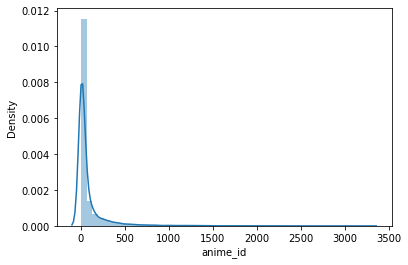

In [ ]:
sns.distplot(df_rating["anime_id"].value_counts(ascending=True))

In [ ]:
df_rating["anime_id"].value_counts(ascending=True)
# most frequent anime id is 1535

3098        1
5201        1
6654        1
3519        1
12497       1
         ... 
1575     2307
6547     2343
11757    2963
16498    3021
1535     3254
Name: anime_id, Length: 7548, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


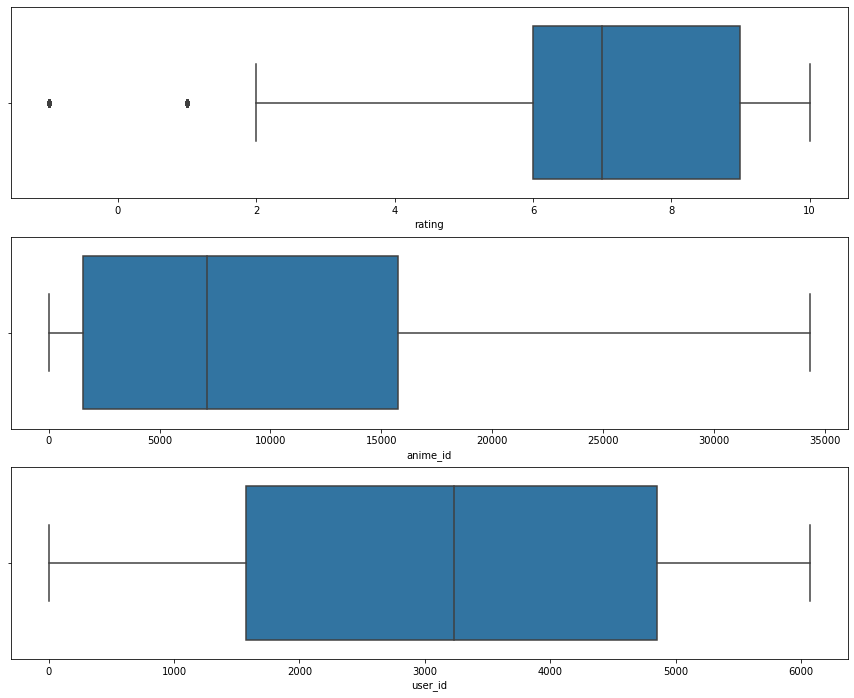

In [ ]:
plt.figure(figsize=(15,12))

plt.subplot(311)
sns.boxplot(df_rating.rating)

plt.subplot(312)
sns.boxplot(df_rating.anime_id)

plt.subplot(313)
sns.boxplot(df_rating.user_id)

## Anime Data

In [ ]:
df_anime.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [ ]:
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [ ]:
samples = df_anime.shape[0]
samples

12294

In [ ]:
df_anime['genre'].value_counts()

Hentai                                                  823
Comedy                                                  523
Music                                                   301
Kids                                                    199
Comedy, Slice of Life                                   179
                                                       ... 
Adventure, Drama, Fantasy, Game, Sci-Fi                   1
Adventure, Demons, Fantasy, Historical                    1
Action, Comedy, Drama, Mecha, Music, Sci-Fi, Shounen      1
Action, Comedy, Fantasy, Mecha, Sci-Fi, Shounen           1
Hentai, Slice of Life                                     1
Name: genre, Length: 3264, dtype: int64

In [ ]:
print(f"There are {str(len(df_anime['genre'].unique()))} (raw/chunk) genres.")
print(f"Top 3 (raw/chunk) genres: Hentai, Comedy, Music.")

There are 3265 (raw/chunk) genres.
Top 3 (raw/chunk) genres: Hentai, Comedy, Music.


### Process Tags

In [7]:
# aim : drop genre column and split the genres individually then concat encoded version
g = list()
for i in range(len(df_anime["genre"])):
  if type(df_anime["genre"][i]) == str: 
    g.append(df_anime["genre"][i].split(","))

print("Length of chunk of genres: ", len(g))

Length of chunk of genres:  12232


In [ ]:
g[0]

['Drama', ' Romance', ' School', ' Supernatural']

In [8]:
l = list()

for i in g:
  for j in i:
    l.append(j)

print("Length of genres individually:", len(l))

Length of genres individually: 36285


In [9]:
genre_len = 0
genre_dict = {}

for i in set(l):
  if not l.count(i) == 0 and type(i) == str:
    genre_dict[i] = l.count(i)
    print(i + ":" + str(l.count(i)))
    genre_len += 1

 Ecchi:572
Shoujo:13
 Super Power:464
Sports:44
 Slice of Life:1117
 School:1170
 Vampire:101
 Shounen:1663
Game:37
Space:1
 Cars:37
Parody:15
 Thriller:86
 Yuri:42
 Dementia:34
 Martial Arts:260
 Supernatural:1023
Ecchi:65
 Fantasy:1815
Hentai:947
Kids:396
Seinen:11
Horror:74
Martial Arts:5
Harem:42
 Historical:636
Yaoi:3
 Military:405
Music:403
 Harem:275
Mecha:118
Mystery:74
 Sports:499
Dementia:206
 Kids:1213
 Magic:716
Demons:85
 Shounen Ai:65
Sci-Fi:84
Fantasy:494
 Mystery:421
 Shoujo:590
Josei:3
 Shoujo Ai:55
Military:21
 Horror:295
Drama:991
 Romance:1371
Comedy:3193
Adventure:1457
 Game:144
Cars:35
School:50
 Josei:51
 Space:380
Historical:170
Psychological:23
 Psychological:206
 Mecha:826
 Demons:209
Super Power:1
Romance:93
 Sci-Fi:1986
Shounen:49
Supernatural:14
Thriller:1
 Yaoi:36
 Seinen:536
 Parody:393
 Comedy:1452
Slice of Life:103
Vampire:1
Samurai:2
Action:2845
 Drama:1025
Police:1
 Adventure:891
Magic:62
 Hentai:194
 Samurai:146
 Music:457
 Police:196


In [ ]:
sum(genre_dict.values())

36285

In [ ]:
print("There are " + str(genre_len) + " genres.")

There are 82 genres.


In [ ]:
genre_dict

{' Adventure': 891,
 ' Cars': 37,
 ' Comedy': 1452,
 ' Dementia': 34,
 ' Demons': 209,
 ' Drama': 1025,
 ' Ecchi': 572,
 ' Fantasy': 1815,
 ' Game': 144,
 ' Harem': 275,
 ' Hentai': 194,
 ' Historical': 636,
 ' Horror': 295,
 ' Josei': 51,
 ' Kids': 1213,
 ' Magic': 716,
 ' Martial Arts': 260,
 ' Mecha': 826,
 ' Military': 405,
 ' Music': 457,
 ' Mystery': 421,
 ' Parody': 393,
 ' Police': 196,
 ' Psychological': 206,
 ' Romance': 1371,
 ' Samurai': 146,
 ' School': 1170,
 ' Sci-Fi': 1986,
 ' Seinen': 536,
 ' Shoujo': 590,
 ' Shoujo Ai': 55,
 ' Shounen': 1663,
 ' Shounen Ai': 65,
 ' Slice of Life': 1117,
 ' Space': 380,
 ' Sports': 499,
 ' Super Power': 464,
 ' Supernatural': 1023,
 ' Thriller': 86,
 ' Vampire': 101,
 ' Yaoi': 36,
 ' Yuri': 42,
 'Action': 2845,
 'Adventure': 1457,
 'Cars': 35,
 'Comedy': 3193,
 'Dementia': 206,
 'Demons': 85,
 'Drama': 991,
 'Ecchi': 65,
 'Fantasy': 494,
 'Game': 37,
 'Harem': 42,
 'Hentai': 947,
 'Historical': 170,
 'Horror': 74,
 'Josei': 3,
 'Kids':

In [ ]:
print(sorted(genre_dict.items(), key=lambda x: x[1], reverse=True))

[('Comedy', 3193), ('Action', 2845), (' Sci-Fi', 1986), (' Fantasy', 1815), (' Shounen', 1663), ('Adventure', 1457), (' Comedy', 1452), (' Romance', 1371), (' Kids', 1213), (' School', 1170), (' Slice of Life', 1117), (' Drama', 1025), (' Supernatural', 1023), ('Drama', 991), ('Hentai', 947), (' Adventure', 891), (' Mecha', 826), (' Magic', 716), (' Historical', 636), (' Shoujo', 590), (' Ecchi', 572), (' Seinen', 536), (' Sports', 499), ('Fantasy', 494), (' Super Power', 464), (' Music', 457), (' Mystery', 421), (' Military', 405), ('Music', 403), ('Kids', 396), (' Parody', 393), (' Space', 380), (' Horror', 295), (' Harem', 275), (' Martial Arts', 260), (' Demons', 209), ('Dementia', 206), (' Psychological', 206), (' Police', 196), (' Hentai', 194), ('Historical', 170), (' Samurai', 146), (' Game', 144), ('Mecha', 118), ('Slice of Life', 103), (' Vampire', 101), ('Romance', 93), (' Thriller', 86), ('Demons', 85), ('Sci-Fi', 84), ('Mystery', 74), ('Horror', 74), (' Shounen Ai', 65), (

### Most Frequent Tags and Word Cloud

In [24]:
sorted_tags = sorted(genre_dict.items(), key=lambda x: x[1], reverse=True)

In [34]:
comment_words = ""

for i in range(len(sorted_tags)):
  sent = (str(sorted_tags[i][0])  + " ") * sorted_tags[i][1]
  comment_words += sent

print("Length of total words: ", len(comment_words))

Length of total words:  306884


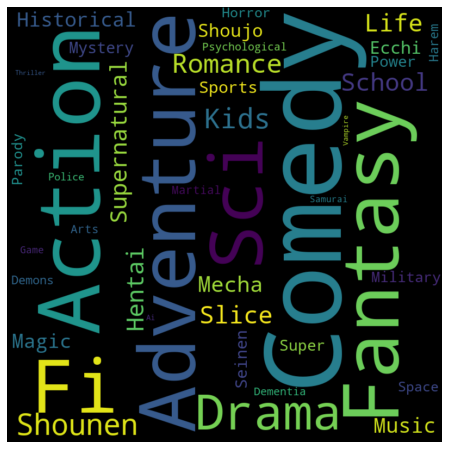

<Figure size 432x288 with 0 Axes>

In [42]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)

# set collocations=False, so words wont duplicate

wc = WordCloud(width=800, 
               height=800,
               background_color="black",
               stopwords=stopwords,
               min_font_size=12,
               max_words=50,
               collocations=False).generate(comment_words)

plt.figure(figsize=(8, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

plt.show()

plt.savefig("/content/frequent_tags.png")

In [ ]:
df_anime[df_anime.anime_id == 1535] # most frequent/members anime is Death Note

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917


## Prepare Data

-----
**ROUTE**

------
* Anime recommendation system will be built based on the amount of common tags.

*+preparation*
* Firstly, anime_id and name will be dropped.
* Then, drop type column. Avoid redundant info since it has 1 episode.
* Then; genre will be encoded as a table. Steps:


  1.   Drop the genre column
  2.   Take the individual genres from the EDA part.
  3.   Make columns for each genre and if included, mark as 1 in table.

*recommendation*
* jaccard distance (the more common tags, the more likely to be recommended) and suggest most related animes -you might like xxx-

In [ ]:
df_anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [46]:
dff_anime = df_anime.drop(["type", "genre"], axis=1)
dff_anime.head()

,anime_id,name,episodes,rating,members
0,32281,Kimi no Na wa.,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,64,9.26,793665
2,28977,Gintama°,51,9.25,114262
3,9253,Steins;Gate,24,9.17,673572
4,9969,Gintama&#039;,51,9.16,151266


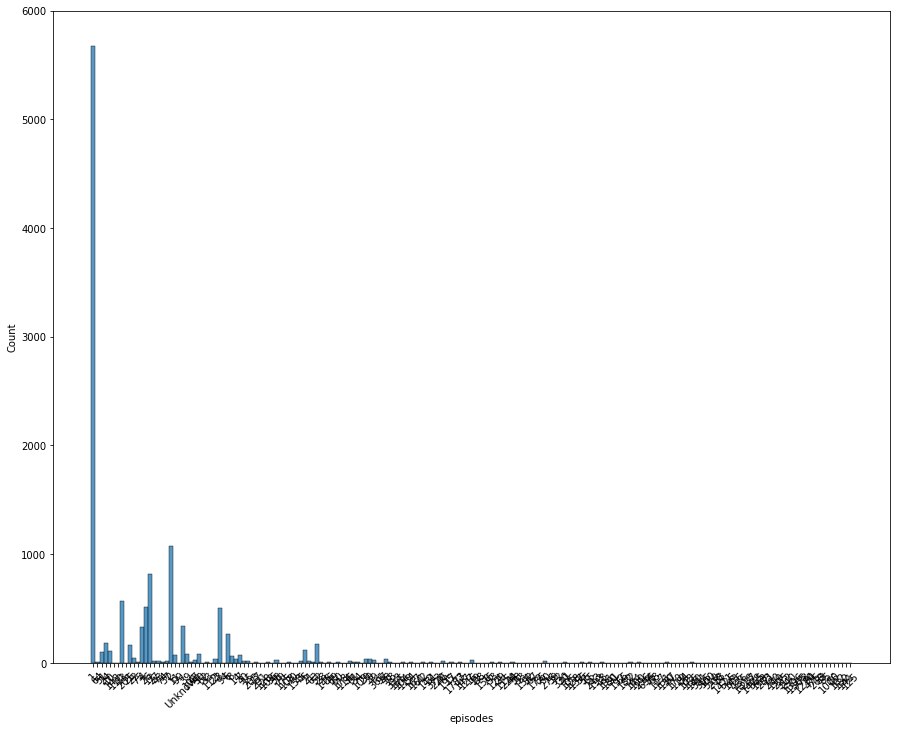

In [ ]:
plt.figure(figsize=(15,12))
sns.histplot(dff_anime.episodes)
plt.ylim(0,6000)
plt.xticks(rotation=45)
plt.show()

Number of episodes is not nicely distributed and there are so many movies so that in order to using episodes in raw format, delete episodes column and create movie column. If it is movie 1, not 0.

In [ ]:
u = 0
r = [u+1 for i in dff_anime.episodes if i == "Unknown"]
print("Number of Unknown episodes: ", sum(r))

Number of Unknown episodes:  340


In [48]:
# cancelled out
"""
for i in range(len(dff_anime.episodes)):
  if dff_anime.episodes[i] == "Unknown":
    dff_anime.episodes[i] = 0 # assuming it is not a movie
  elif int(dff_anime.episodes[i]) == 1:
    dff_anime.episodes[i] = 1
  else:
    dff_anime.episodes[i] = 0

dff_anime.episodes[0:10]
"""

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0    1
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    1
9    0
Name: episodes, dtype: object

In [ ]:
# print("Number of movies: ", sum(dff_anime.episodes))

Number of movies:  5677


In [ ]:
# dff_anime.tail()

,anime_id,name,episodes,rating,members
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,1,4.15,211
12290,5543,Under World,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,0,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,1,4.98,175
12293,26081,Yasuji no Pornorama: Yacchimae!!,1,5.46,142


In [49]:
template_columns = list()

for i in set(l):
  template_columns.append(i)

print(template_columns)

[' Ecchi', 'Shoujo', ' Super Power', 'Sports', ' Slice of Life', ' School', ' Vampire', ' Shounen', 'Game', 'Space', ' Cars', 'Parody', ' Thriller', ' Yuri', ' Dementia', ' Martial Arts', ' Supernatural', 'Ecchi', ' Fantasy', 'Hentai', 'Kids', 'Seinen', 'Horror', 'Martial Arts', 'Harem', ' Historical', 'Yaoi', ' Military', 'Music', ' Harem', 'Mecha', 'Mystery', ' Sports', 'Dementia', ' Kids', ' Magic', 'Demons', ' Shounen Ai', 'Sci-Fi', 'Fantasy', ' Mystery', ' Shoujo', 'Josei', ' Shoujo Ai', 'Military', ' Horror', 'Drama', ' Romance', 'Comedy', 'Adventure', ' Game', 'Cars', 'School', ' Josei', ' Space', 'Historical', 'Psychological', ' Psychological', ' Mecha', ' Demons', 'Super Power', 'Romance', ' Sci-Fi', 'Shounen', 'Supernatural', 'Thriller', ' Yaoi', ' Seinen', ' Parody', ' Comedy', 'Slice of Life', 'Vampire', 'Samurai', 'Action', ' Drama', 'Police', ' Adventure', 'Magic', ' Hentai', ' Samurai', ' Music', ' Police']


In [50]:
template_columns = ['Ecchi',  
                    'Thriller', 
                    'Shounen', 
                    'Adventure', 
                    'Mecha', 
                    'Magic', 
                    'Adventure', 
                    'Sci-Fi', 
                    'Parody', 
                    'Fantasy', 
                    'Mystery', 
                    'Vampire', 
                    'Hentai', 
                    'Space', 
                    'Music', 
                    'Shoujo', 
                    'Sci-Fi', 
                    'Sports', 
                    'Parody', 
                    'Mystery', 
                    'Supernatural', 
                    'Military', 
                    'Cars', 
                    'Josei', 
                    'Shounen Ai', 
                    'Dementia', 
                    'Seinen', 
                    'Harem', 
                    'Shounen', 
                    'Horror', 
                    'Fantasy', 
                    'Space', 
                    'Horror', 
                    'Magic', 
                    'Psychological', 
                    'School', 
                    'Yuri', 
                    'School', 
                    'Music', 
                    'Yaoi', 
                    'Comedy',
                    'Supernatural', 
                    'Martial Arts', 
                    'Josei', 
                    'Shoujo Ai', 
                    'Cars', 
                    'Vampire', 
                    'Slice of Life', 
                    'Samurai', 
                    'Demons', 
                    'Sports', 
                    'Action', 
                    'Historical', 
                    'Kids', 
                    'Ecchi', 
                    'Harem', 
                    'Drama', 
                    'Mecha', 
                    'Seinen', 
                    'Kids', 
                    'Historical', 
                    'Game', 
                    'Super Power',
                    'Samurai', 
                    'Romance', 
                    'Police', 
                    'Super Power', 
                    'Military', 
                    'Police', 
                    'Dementia', 
                    'Drama', 
                    'Shoujo', 
                    'Martial Arts', 
                    'Yaoi', 
                    'Psychological', 
                    'Romance', 
                    'Game', 
                    'Comedy']

template_columns = set(template_columns)
template_ = pd.DataFrame(np.zeros((dff_anime.shape[0], len(template_columns))), columns=template_columns)
template_.head()

,Military,Shoujo,Horror,Martial Arts,Sports,Super Power,Harem,Yaoi,Drama,Comedy,...,Fantasy,Shoujo Ai,Hentai,Historical,Psychological,Police,Magic,Kids,Josei,Seinen
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
template_.columns

Index(['Military', 'Shoujo', 'Horror', 'Martial Arts', 'Sports', 'Super Power',
       'Harem', 'Yaoi', 'Drama', 'Comedy', 'Music', 'Romance', 'Game',
       'Adventure', 'Space', 'Mecha', 'Shounen', 'Mystery', 'Parody',
       'Dementia', 'Yuri', 'Supernatural', 'Thriller', 'Shounen Ai', 'Cars',
       'Demons', 'School', 'Vampire', 'Sci-Fi', 'Slice of Life', 'Samurai',
       'Action', 'Ecchi', 'Fantasy', 'Shoujo Ai', 'Hentai', 'Historical',
       'Psychological', 'Police', 'Magic', 'Kids', 'Josei', 'Seinen'],
      dtype='object')

In [52]:
for i in range(len(g)):
  for tag in g[i]:
    try:
      if tag.startswith(" "): # drop space at the beginnig
            template_[tag[1:]][i] = 1
      else:
            template_[tag][i] = 1
    except:
      # for missing or wrong labels
      print(tag)

template_.head()    

,Military,Shoujo,Horror,Martial Arts,Sports,Super Power,Harem,Yaoi,Drama,Comedy,...,Fantasy,Shoujo Ai,Hentai,Historical,Psychological,Police,Magic,Kids,Josei,Seinen
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dff_anime.shape

(12294, 5)

In [ ]:
template_.shape

(12294, 43)

In [53]:
dff_anime_last = dff_anime.join(template_)
dff_anime_last

,anime_id,name,episodes,rating,members,Military,Shoujo,Horror,Martial Arts,Sports,...,Fantasy,Shoujo Ai,Hentai,Historical,Psychological,Police,Magic,Kids,Josei,Seinen
0,32281,Kimi no Na wa.,1,9.37,200630,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5114,Fullmetal Alchemist: Brotherhood,0,9.26,793665,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,28977,Gintama°,0,9.25,114262,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9253,Steins;Gate,0,9.17,673572,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9969,Gintama&#039;,0,9.16,151266,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,1,4.15,211,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12290,5543,Under World,1,4.28,183,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12291,5621,Violence Gekiga David no Hoshi,0,4.88,219,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,1,4.98,175,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# save this processed table
dff_anime_last.to_csv("/content/anime_tags_table.csv")

In [ ]:
dff_anime_last.columns

Index(['anime_id', 'name', 'episodes', 'rating', 'members', 'Mecha',
       'Thriller', 'Sports', 'Adventure', 'Cars', 'Parody', 'Mystery',
       'Slice of Life', 'Supernatural', 'Military', 'Magic', 'Josei',
       'Samurai', 'Seinen', 'Super Power', 'Sci-Fi', 'Harem', 'Shounen Ai',
       'Shounen', 'Horror', 'Yuri', 'Demons', 'Police', 'Fantasy', 'Dementia',
       'Action', 'Historical', 'Psychological', 'Shoujo Ai', 'Vampire',
       'Hentai', 'School', 'Drama', 'Martial Arts', 'Kids', 'Ecchi', 'Yaoi',
       'Space', 'Romance', 'Music', 'Shoujo', 'Game', 'Comedy'],
      dtype='object')

In [ ]:
def jaccard_dist(animeset, youranime):
  rows = animeset.shape[0]
  dists = dict()

  for i in range(rows):
    commons = sum(animeset.iloc[i] == youranime)
    portion = commons / len(animeset.iloc[i]) * 100
    dists[i] = portion
  
  s = sorted(dists.items(), key=lambda x: x[1], reverse=True)
  recommendations = s[0:10]

  d = list()

  for i in range(len(recommendations)):
    rec = recommendations[i][0]
    sim = recommendations[i][1]
    d.append([dff_anime_last.iloc[rec]["name"], dff_anime_last.iloc[rec]["rating"], dff_anime_last.iloc[rec]["episodes"], sim])
  
  #print(recommendations)
  hm = pd.DataFrame(d, columns = ["Anime", "Rate", "Episodes", "Similarity"])

  print("You may also like:")
  display(hm)

In [ ]:
jaccard_dist(dff_anime_last, dff_anime_last.iloc[4572])

You may also like:


,Anime,Rate,Episodes,Similarity
0,Rewrite,6.69,13,100.000000
1,Soukyuu no Fafner: Dead Aggressor - Exodus 2nd...,7.74,13,91.666667
2,Soukyuu no Fafner: Dead Aggressor - Exodus,7.44,13,91.666667
3,Sore ga Seiyuu!,7.15,13,91.666667
4,Mobile Suit Gundam 00 Special Edition,7.77,3,89.583333
5,Soukyuu no Fafner: Right of Left - Single Program,7.49,1,89.583333
6,Soukyuu no Fafner: Dead Aggressor - Heaven and...,7.46,1,89.583333
7,Soukyuu no Fafner: Dead Aggressor,7.38,25,89.583333
8,Soukou Kihei Votoms: The Last Red Shoulder,7.32,1,89.583333
9,Soukyuu no Fafner: Dead Aggressor - Exodus Spe...,7.33,1,89.583333


In [ ]:
def adjust_userdata(tags):
  cols = ["anime_id", "name", "episodes", "rating", "members", *template_columns]
  dd = pd.DataFrame([np.zeros(48)], columns=cols)
  dd.rating = 9.8
  for i in range(dff_anime_last.shape[0]):
    for tag in tags:
      dd[tag][i] = 1
  
  return dd

In [ ]:
go = True
tags = list()

while go:
  
  decision = input("To add a tag, press A. To recommendations, press R.")

  if decision == "A" or decision == "a":
    tag = input("Write the tag you are interested in: ")
    tags.append(tag)

  elif decision == "R" or decision == "r":

    print(f"The tags are {tags}.")

    userdata = adjust_userdata(tags)
    
    jaccard_dist(dff_anime_last, userdata.iloc[0])
  
    prr = input("Press Q to quit, press C to continue.")

    if prr == "q" or prr == "Q":
      go = False

    elif prr == "c" or prr == "C":
      x = input("Press D to reset tags. Press C to continue without resetting.")

      if x == "d" or x == "D":
        tags = list()
  
  else:
    print("Something is wrong.")
    break

The tags are ['Comedy', 'Slice of Life'].
You may also like:


,Anime,Rate,Episodes,Similarity
0,Barakamon,8.50,12,89.583333
1,Gochuumon wa Usagi Desu ka??,8.01,12,89.583333
2,Working&#039;!!,7.98,13,89.583333
3,Jungle wa Itsumo Hare nochi Guu Deluxe,7.95,6,89.583333
4,Chi&#039;s Sweet Home,7.83,104,89.583333
5,Working!!,7.82,13,89.583333
6,New Game!,7.81,12,89.583333
7,Ichigo Mashimaro Encore,7.79,2,89.583333
8,Servant x Service,7.79,13,89.583333
9,Jungle wa Itsumo Hare nochi Guu Final,7.78,7,89.583333


The tags are ['Action', 'Drama', 'Shoujo Ai'].
You may also like:


,Anime,Rate,Episodes,Similarity
0,Black Jack 21,7.77,17,87.500000
1,Wakaba*Girl: Onsen Tsukaritai,7.02,1,87.500000
2,Senkou no Night Raid Specials,6.99,3,87.500000
3,Abunai Sisters: Koko &amp; Mika,2.95,10,87.500000
4,Kappa no Ude,4.46,1,87.500000
5,Shounen Santa no Daibouken!,6.12,24,87.500000
6,Ganko-chan,NaN,Unknown,87.500000
7,Tsumiki no Ie,8.27,1,85.416667
8,Tokyo Magnitude 8.0,8.19,11,85.416667
9,Grisaia no Meikyuu: Caprice no Mayu 0,8.05,1,85.416667


Press Q to quit, press C to continue.q
